In [ ]:
import pandas as pd
import numpy as np
import sys
import os
from openpyxl import load_workbook
import scipy.spatial
import math
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/marged_vf40.xlsx')
df.shape

(50927, 40)

In [ ]:
df = df.drop(['Unnamed: 0', 'radius' , 'region' , 'set'] , axis = 1)

In [ ]:
df.columns

Index(['X_coord', 'Y_coord', 'M_pri', 'S_11', 'S_22', 'S_33', 'S_12', 'NNPA',
       'NND1', 'NND2', 'NND3', 'NND4', 'NND5', 'NND6', 'NND7', 'NND8',
       'AVG_NND2', 'AVG_NND4', 'AVG_NND6', 'AVG_NND8', 'NNA1', 'NNA2', 'VF_3R',
       'VF_4R', 'NNA3', 'NNA4', 'NNA5', 'NNA6', 'NNA7', 'NNA8', 'vf_5r',
       'vf_6r', 'vf_7r', 'vf_8r', 'x1', 'y1'],
      dtype='object')

In [ ]:
df.shape

(50927, 36)

In [ ]:
dataset = df.values
dataset

array([[1.77173399e+03, 6.15442582e+02, 8.60888351e+00, ...,
        4.06807976e-01, 1.80796210e+03, 5.34313454e+02],
       [2.54146263e+03, 2.61319439e+03, 9.82600237e+00, ...,
        5.00214706e-01, 2.45689860e+03, 2.57651226e+03],
       [2.64267725e+03, 2.97351667e+03, 9.35039338e+00, ...,
        4.26215482e-01, 2.60496537e+03, 2.89476324e+03],
       ...,
       [1.90268080e+03, 2.57016932e+03, 1.20385255e+01, ...,
        3.88169011e-01, 1.95843662e+03, 2.50452775e+03],
       [2.80185665e+02, 9.10478540e+02, 7.87983344e+00, ...,
        4.48626290e-01, 3.24727850e+02, 8.34722964e+02],
       [9.59403859e+02, 1.87016039e+03, 1.66465778e+01, ...,
        4.23732181e-01, 1.04941541e+03, 1.86485027e+03]])

In [ ]:

Y = dataset[: , 2]

Feature Dropping

In [ ]:
df = df.drop(['M_pri' , 'S_11' , 'S_22', 'S_33', 'S_12'],axis=1)
df.columns
dataset = df.values
X= dataset[:,:]

In [ ]:

df.columns

Index(['X_coord', 'Y_coord', 'NNPA', 'NND1', 'NND2', 'NND3', 'NND4', 'NND5',
       'NND6', 'NND7', 'NND8', 'AVG_NND2', 'AVG_NND4', 'AVG_NND6', 'AVG_NND8',
       'NNA1', 'NNA2', 'VF_3R', 'VF_4R', 'NNA3', 'NNA4', 'NNA5', 'NNA6',
       'NNA7', 'NNA8', 'vf_5r', 'vf_6r', 'vf_7r', 'vf_8r', 'x1', 'y1'],
      dtype='object')

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
# X_test = s_scaler.transform(X_test.astype(np.float))
# Y_test = StandardScaler().fit_transform(Y_test.reshape(len(Y_test),1))[:,0]
Y_train = StandardScaler().fit_transform(Y_train.reshape(len(Y_train),1))[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Artificial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(5,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=[Accuracy()])

In [ ]:
model.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),batch_size=128,epochs=1000)

model.summary()

Epoch 1/1000
319/319 [==============================] - 3s 5ms/step - loss: 0.8543 - val_loss: 244063.4844
Epoch 2/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.5082 - val_loss: 295620.5938
Epoch 3/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.4394 - val_loss: 116347.8672
Epoch 4/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.4110 - val_loss: 36850.2461
Epoch 5/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.3954 - val_loss: 20519.6992
Epoch 6/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.3864 - val_loss: 23013.1152
Epoch 7/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.3736 - val_loss: 13693.3770
Epoch 8/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.3664 - val_loss: 7046.1411
Epoch 9/1000
319/319 [==============================] - 1s 4ms/step - loss: 0.3599 - val_loss: 3157.4009
Epoch 10/1000
319/319 [======================

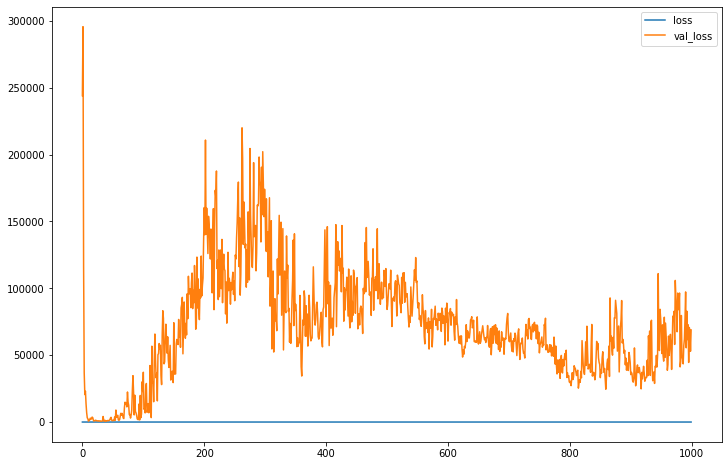

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

319/319 [==============================] - 1s 2ms/step
MAE: 202.7876159236318


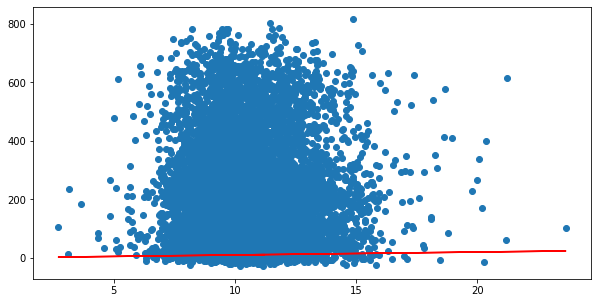

In [ ]:
Y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))  
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred)
# Perfect predictions
plt.plot(Y_test,Y_test,'r')

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-21594.889928495864

Feature Importance

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5

In [ ]:
from eli5.sklearn import PermutationImportance

In [ ]:
feature_names = df.columns

In [ ]:
perm = PermutationImportance(model, scoring='neg_mean_squared_error', random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = df.columns.tolist())

319/319 [==============================] - 1s 2ms/step


Weight,Feature
61013.8842 ± 2472.9435,y1
59323.1437 ± 2050.0584,Y_coord
9352.9963 ± 925.2486,X_coord
9285.0826 ± 293.2634,x1
218.8814 ± 33.6790,NND4
105.7432 ± 68.0126,NNA2
45.7007 ± 47.9017,NNA1
35.3521 ± 6.2149,AVG_NND4
21.9291 ± 63.8088,NNA8
20.0483 ± 31.2055,NND6
